In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.patches as mpatches

In [100]:
def filter_yearly(df):
    total = 0
    amount = []
    for index, row in df.iterrows():
        if row[df.columns[0]] > total:
            total = row[df.columns[0]] 
        if (float(index) % 1 == 0):
            amount.append(total)
            total = 0
    return np.array(amount)

In [3]:
def filter_yearly_avg(df):
    total = 0
    amount = []
    counter = 0
    for index, row in df.iterrows():
        total += row[df.columns[0]]
        counter += 1
        if (float(index) % 1 == 0):
            amount.append(total/counter)
            total, counter = 0, 0
    return np.array(amount)

In [4]:
def ditch_M(df):
    df[df.columns[0]] = df[df.columns[0]].apply(lambda value: float(value.replace("M",'')) * 1000000 if "M" in value else value)
    return df

In [5]:
all_df = pd.read_csv("all.txt", delimiter="\t")

In [6]:
all_df = all_df.iloc[:, :-1]

# Human cases
Model variable: symptomatic infections

In [112]:
human_cases_df = pd.DataFrame(all_df.loc[all_df.Date.str.contains("CPY Cases")].iloc[-1, :])[1:]

In [113]:
human_cases_df = ditch_M(human_cases_df)

In [114]:
human_cases_df[human_cases_df.columns[0]] = human_cases_df[human_cases_df.columns[0]].astype(float)

In [115]:
human_cases_df = filter_yearly(human_cases_df)

In [116]:
human_cases_df

array([    0. , 68513.3, 67048. , 67870.5, 68703.2, 69541.5, 70384.5,
       71233. , 72086.7, 72945.6, 73809.6, 74679.2, 75554.1, 76434.1,
       77319. , 78209. , 79104.3, 80005. , 80911.4, 81823. , 82740.2,
       83662.1, 84590.1, 85523.2, 86461.7, 87405.4, 88354.5, 89309.5,
       90269.3])

In [117]:
vlaanderen = np.array([78970, 67260, 71246])

In [118]:
vlaanderen_avg = np.mean(vlaanderen)

In [108]:
human_cases_years =human_cases_years.astype(int)

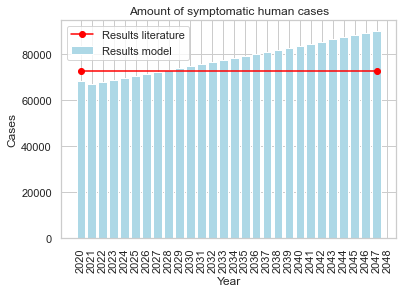

In [120]:
#plt.plot([vlaanderen_avg] * len(human_cases_years), color="red")
x1 = [0, 27]
y2 = [vlaanderen_avg] *2
plt.plot(x1, y2, color="red", marker='o')

plt.bar(height = human_cases_df[1:], x = np.arange(len(human_cases_df[1:])), color="lightblue")
plt.xlabel('Year'); plt.ylabel('Cases')
plt.xticks(np.arange(len(human_cases_years[1:])), np.arange(2020, 2049), rotation=90)
plt.title('Amount of cases with campylobacteriosis')
plt.legend(["Results literature", "Results model"])
plt.savefig('human_cases.png', dpi=300,  bbox_inches='tight')
plt.show()

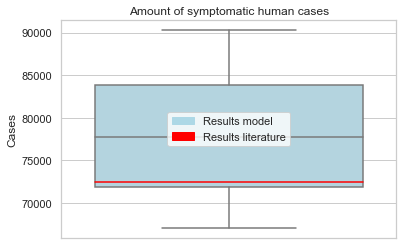

In [121]:
ax = sns.boxplot(y=human_cases_df[1:], color="lightblue")
x1 = [-0.4, .4]
y2 = [vlaanderen_avg] *2
plt.plot(x1, y2, color="red")

mod_patch = mpatches.Patch(color='lightblue', label='Results model')
lit_patch = mpatches.Patch(color="red", label='Results literature')

plt.ylabel('Cases')
plt.title('Amount of cases with campylobacteriosis')
plt.legend(handles=[mod_patch, lit_patch])
plt.savefig('human_cases2.png', dpi=300,  bbox_inches='tight')
plt.show()

# Chickens
Model variable: proportion of CPY-positive chickens
$41,9$-$58.1\%$

In [129]:
chickens_df = pd.DataFrame(all_df.loc[all_df.Date.str.contains("proportion of CPY-positive chickens")]).T[1:]

In [130]:
chickens_df[chickens_df.columns[0]] = chickens_df[chickens_df.columns[0]].astype(float)

In [131]:
chickens_df[chickens_df.columns[0]] = chickens_df[chickens_df.columns[0]]  * 100

In [132]:
chickens_yearly = filter_yearly_avg(chickens_df)

In [133]:
chickens_yearly

array([ 0.        , 41.67468817, 42.38223873, 42.53305485, 42.63339868,
       42.71211914, 42.8108188 , 42.9039464 , 42.99269928, 43.05563321,
       43.16782974, 43.25236343, 43.32834778, 43.40228995, 43.49859401,
       43.59653885, 43.68247998, 43.72543548, 43.84948381, 43.93369664,
       44.00511928, 44.07059211, 44.18461355, 44.25241473, 44.35096499,
       44.38549976, 44.5148699 , 44.59787398, 44.67896727])

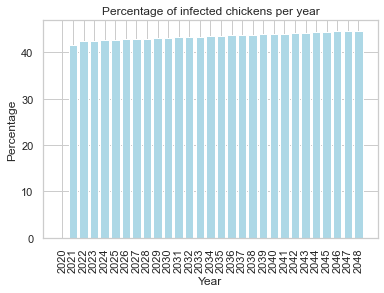

In [134]:
fig = plt.figure()
plt.bar(height = chickens_yearly, x = np.arange(len(chickens_yearly)), color="lightblue")
plt.xticks(np.arange(len(chickens_yearly)), np.arange(2020, 2049), rotation=90)
plt.xlabel('Year'); plt.ylabel('Percentage')
plt.title('Percentage of infected chickens per year')
plt.legend('',frameon=False)
plt.savefig('chickens.png', dpi=300,  bbox_inches='tight')
plt.show()

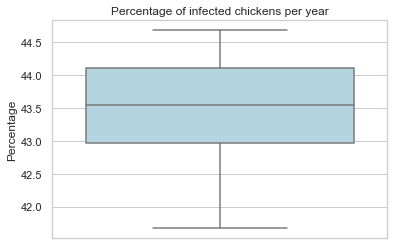

In [135]:
ax = sns.boxplot(y=chickens_yearly[1:], color="lightblue")
plt.ylabel('Percentage')
plt.title('Percentage of infected chickens per year')
plt.legend('',frameon=False)
plt.savefig('chickens2.png', dpi=300,  bbox_inches='tight')
plt.show()

# Source
Model variable: rate of human infection from environment
$20$-$60\%$ from enviro

In [136]:
env_inf_df  = pd.DataFrame(all_df.loc[all_df.Date.str.contains("rate of human infection from environment")]).iloc[:, 1:].T

In [137]:
env_inf_df[env_inf_df.columns[0]] = env_inf_df[env_inf_df.columns[0]].astype(float)

In [138]:
meat_df = pd.DataFrame(all_df.loc[all_df.Date.str.contains("contaminated meat consumption")]).T[1:]

In [139]:
infection_df = pd.DataFrame(all_df.loc[all_df.Date.str.contains("infections per kg of meat consumed")]).T[1:]

In [140]:
infection_df =infection_df.apply(lambda x: '%.5f' % x, axis=1)

In [141]:
infection_df =pd.DataFrame(infection_df)

In [142]:
meat_df = ditch_M(meat_df)

In [143]:
meat_df[meat_df.columns[0]] = meat_df[meat_df.columns[0]].astype(float)

In [144]:
infection_df[infection_df.columns[0]] = infection_df[infection_df.columns[0]].astype(float)

In [145]:
meat_df["consumed"] = meat_df[meat_df.columns[0]] * infection_df[infection_df.columns[0]] 

In [146]:
meat_df["total"] = meat_df["consumed"] + env_inf_df[env_inf_df.columns[0]]

In [147]:
meat_df["percentage"] = meat_df["consumed"]/meat_df["total"] * 100

In [148]:
yearly_source_avg = filter_yearly_avg(pd.DataFrame(meat_df["percentage"]))

In [149]:
yearly_source_avg_df = pd.DataFrame(yearly_source_avg).reset_index(drop=True)

In [150]:
yearly_source_avg_df.index += 2020

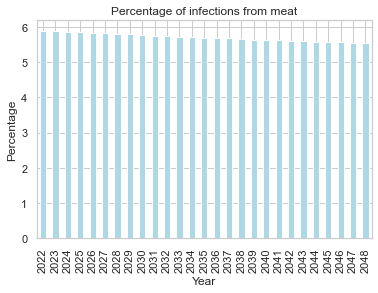

In [151]:
#ax = meat_df.plot(y="percentage", use_index=True) 
#human_cases_df.plot(y=human_cases_df.columns[0], use_index=True, ax = ax) 
yearly_source_avg_df[2:].plot.bar(y=yearly_source_avg_df.columns[0], use_index=True, color="lightblue") 
plt.xlabel('Year'); plt.ylabel('Percentage')
plt.title('Percentage of infections from meat')
plt.legend('',frameon=False)
plt.savefig('source.png', dpi=300,  bbox_inches='tight')
plt.show()

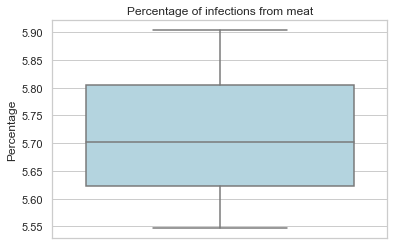

In [152]:
ax = sns.boxplot(y=yearly_source_avg_df[yearly_source_avg_df.columns[0]][2:], color="lightblue")


plt.ylabel('Percentage')
plt.title('Percentage of infections from meat')
plt.legend('',frameon=False)
plt.savefig('source2.png', dpi=300,  bbox_inches='tight')
plt.show()

# DALYs

In [40]:
dalys_df  = pd.DataFrame(all_df.loc[all_df.Date.str.contains("DALY")].iloc[0])[1:]

In [41]:
dalys_df = ditch_M(dalys_df)

In [42]:
dalys_df[dalys_df.columns[0]] = dalys_df[dalys_df.columns[0]].astype(float)

In [43]:
dalys_df.index = dalys_df.index.astype(float)

In [44]:
dalys_df = dalys_df[dalys_df.index % 1 == 0]

In [45]:
dalys_df["diff"] = dalys_df.diff().iloc[:, -1]

In [46]:
mangen_dalys_avg = 635

In [47]:
dalys_df.index = dalys_df.index.astype(int)

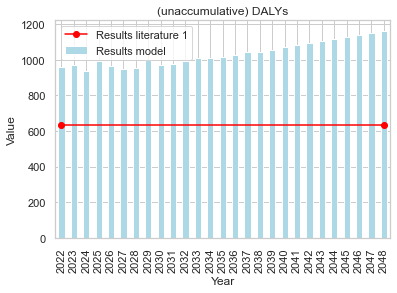

In [48]:
dalys_df[2:].plot.bar(y="diff", use_index=True, color="lightblue")
x1 = [0, 26]
y2 = [mangen_dalys_avg] *2
plt.plot(x1, y2, color="red", marker='o')
plt.xlabel('Year'); plt.ylabel('Value')
plt.title('(unaccumulative) DALYs')
plt.legend(["Results literature 1", "Results model"])
plt.savefig('dalys.png', dpi=300,  bbox_inches='tight')
plt.show()

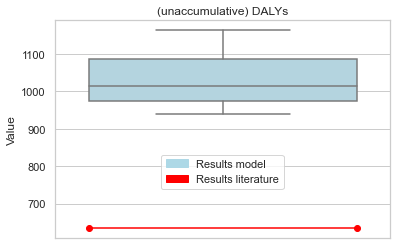

In [49]:
ax = sns.boxplot(y=dalys_df["diff"][2:], color="lightblue")
x1 = [-0.4, .4]
y2 = [mangen_dalys_avg] *2
plt.plot(x1, y2, color="red", marker='o')


mod_patch = mpatches.Patch(color='lightblue', label='Results model')
lit_patch = mpatches.Patch(color="red", label='Results literature')

plt.legend(handles=[mod_patch, lit_patch], bbox_to_anchor=(0.3, 0.2))

plt.ylabel('Value')
plt.title('(unaccumulative) DALYs')
plt.savefig('dalys2.png', dpi=300,  bbox_inches='tight')
plt.show()

# CoI

In [50]:
coi_df  = pd.DataFrame(all_df.loc[all_df.Date.str.contains("Cost of Illness")].iloc[0])[1:]

In [51]:
coi_df = ditch_M(coi_df)

In [52]:
coi_df[coi_df.columns[0]] = coi_df[coi_df.columns[0]].astype(float)

In [53]:
coi_df.index = coi_df.index.astype(float)

In [54]:
coi_df = coi_df[coi_df.index % 1 == 0]

In [55]:
coi_df["diff"] = coi_df.diff().iloc[:, -1]

In [56]:
#source: mangen et al
mangen_coi_avg = 20600 * 1000

vlaanderen_coi = np.array([64, 55, 64])
vlaanderen_coi_avg = np.mean(vlaanderen_coi)


In [57]:
coi_df.index = coi_df.index.astype(int)

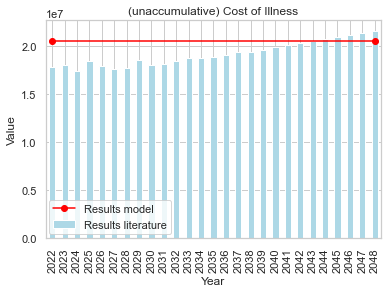

In [58]:
coi_df[2:].plot.bar(y="diff", use_index=True, color="lightblue")
x1, y1 = [0, 26], [mangen_coi_avg,mangen_coi_avg]
plt.plot(x1, y1, color="red", marker='o')
plt.xlabel('Year'); plt.ylabel('Value')
plt.title('(unaccumulative) Cost of Illness')
plt.legend(["Results model", "Results literature"], bbox_to_anchor=(0.39, 0.2))
plt.savefig('coi.png', dpi=300,  bbox_inches='tight')
plt.show()

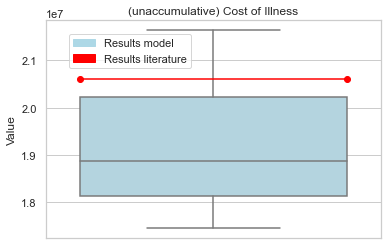

In [59]:
ax = sns.boxplot(y=coi_df["diff"][2:], color="lightblue")
x1 = [-0.4, .4]
y2 = [mangen_coi_avg] *2
plt.plot(x1, y2, color="red", marker='o')


mod_patch = mpatches.Patch(color='lightblue', label='Results model')
lit_patch = mpatches.Patch(color="red", label='Results literature')

plt.legend(handles=[mod_patch, lit_patch], bbox_to_anchor=(0.45, 0.755))

plt.ylabel('Value')
plt.title('(unaccumulative) Cost of Illness')
plt.savefig('coi2.png', dpi=300,  bbox_inches='tight')
plt.show()